In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


In [2]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [3]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['logWeightedAverage'] = df['weightedAverage'].apply(np.log)


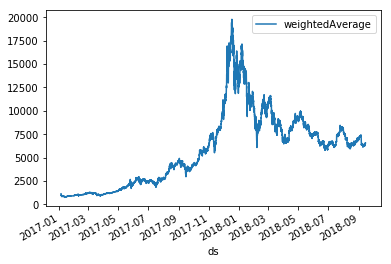

In [4]:
df.plot(x='ds', y ='weightedAverage')

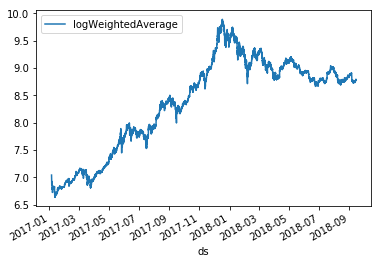

In [5]:
df.plot(x='ds', y ='logWeightedAverage')

Standard bitcoin historical price graph.

In [6]:
from scipy.stats import describe
print('linear stats ' + str(describe(df['weightedAverage'])))
print('log stats ' + str(describe(df['logWeightedAverage'])))

linear stats DescribeResult(nobs=14805, minmax=(759.20800695, 19781.95031876), mean=5824.214756072369, variance=15748440.486714538, skewness=0.7202220908596919, kurtosis=0.17731218902986612)
log stats DescribeResult(nobs=14805, minmax=(6.6322757938022745, 9.892525200859973), mean=8.37035755507109, variance=0.7206517818707939, skewness=-0.49517970012980955, kurtosis=-0.9872079003853038)


|   |linear   |log   |
|---|---|---|
|mean   |5817.83662477842   |8.365708530321312   |
|variance   |15934387.18504999   |0.7275014560523686   |
|skewness   |0.7209291658182619   |-0.4788483915373271   |
|kurtosis   |0.14552149255314006   |-1.0122969215008524   |

The log stats have a lot less variance relative to the mean values along with less skewness (difference from the normal distribution) but in the other direction. The kurtosis for linear stats is a lot closer to normal than the log stats, indicating a flatter peak than normal for the log stats. Values for log-returns in the study here (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0133678) have a very high positive kurtosis (22.425) indicating a very sharp non-normal peak and negative skewness.

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


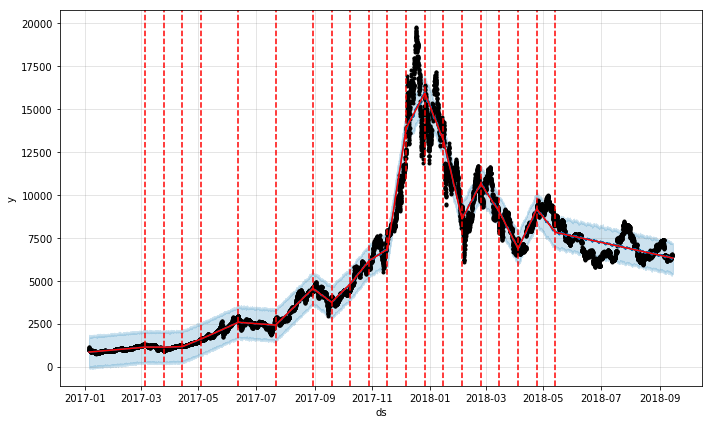

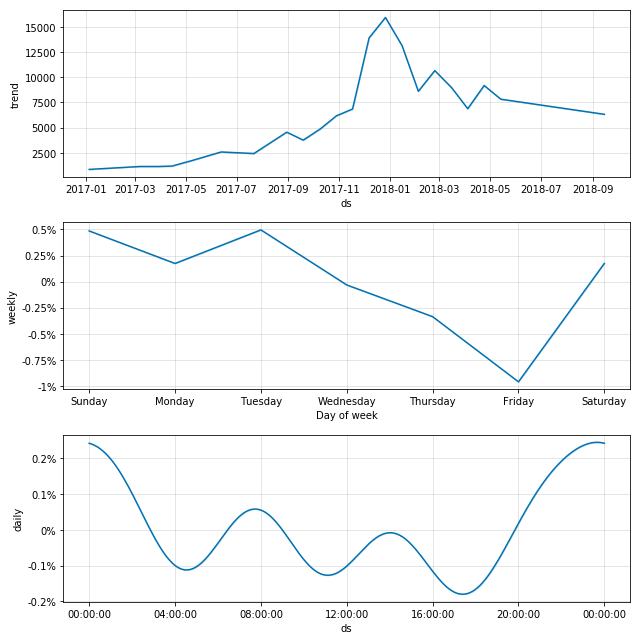

In [7]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


Linear Graphs


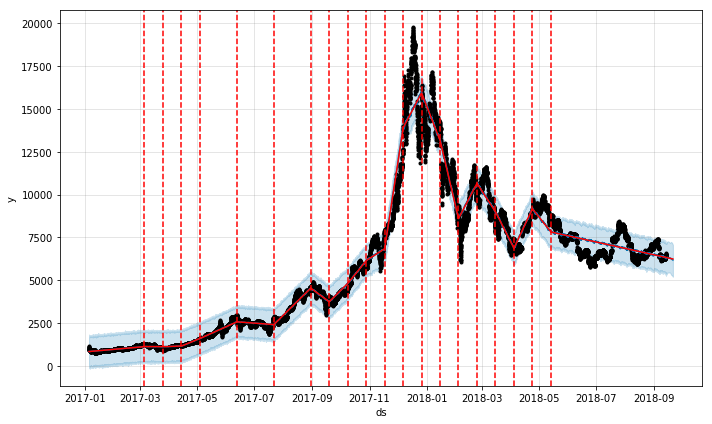

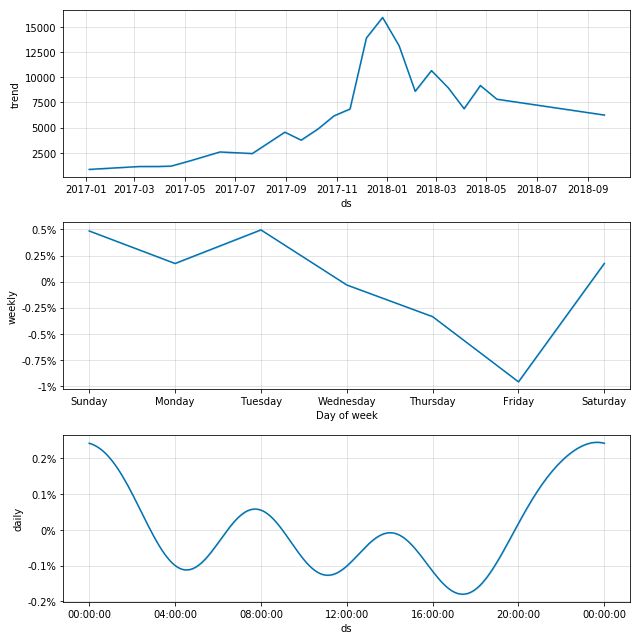

In [8]:
future = m.make_future_dataframe(periods=7)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


Linear Graphs


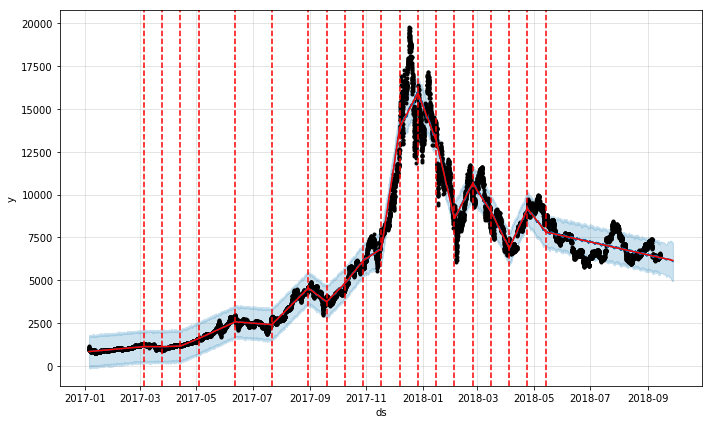

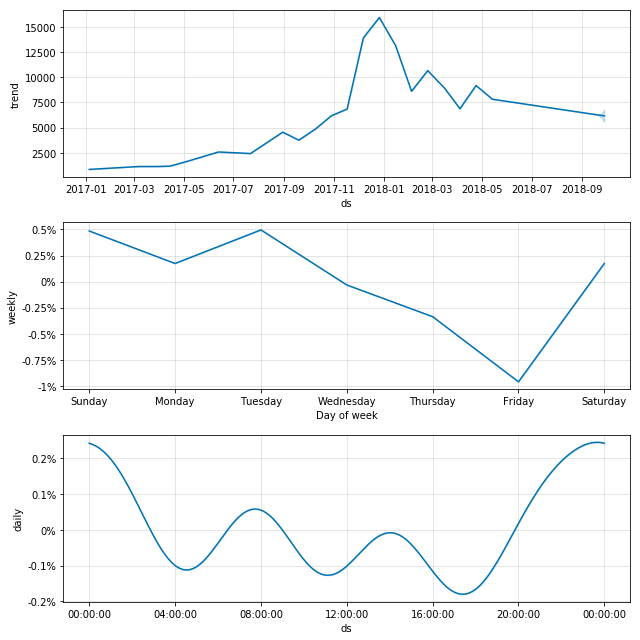

In [9]:
future = m.make_future_dataframe(periods=14)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)


Linear Graphs


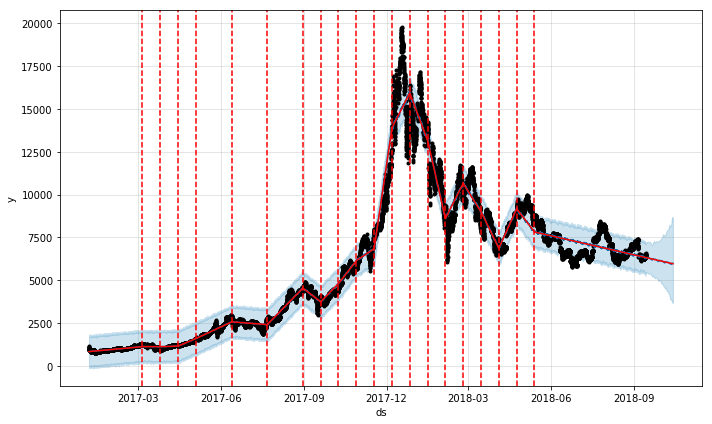

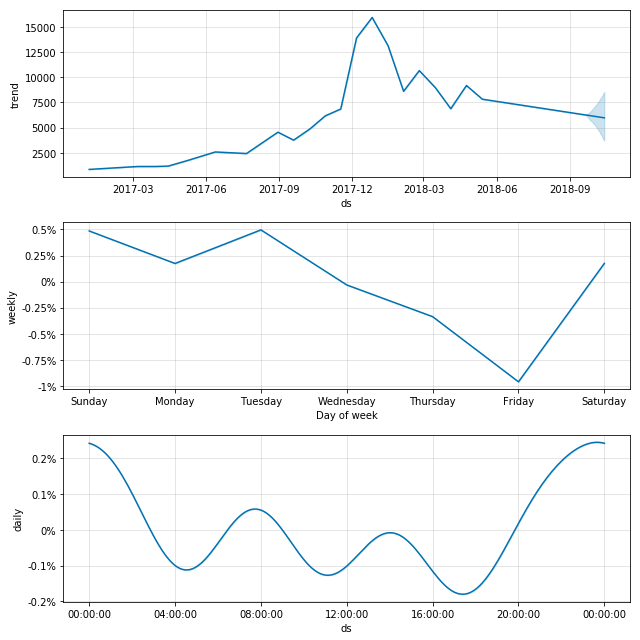

In [10]:
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

Day of week graph makes sense. Price always seems to top out on Sundays while the bears win out over the week.

The daily graph shows how there are multiple regions trading Bitcoin (makes sense) given the multiple local maxima. Midnight GMT corresponds with 5pm LA time, 8am GMT is 5pm Tokyo time, 15 GMT is afternoon in Europe, corresponding with the 3 primary trading regions (USA, SK/JP/AUS, EUR), all with their own local max.

There's obviously a wide range of future price predictions given the historical volatility of Bitcoin.

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Log Graphs


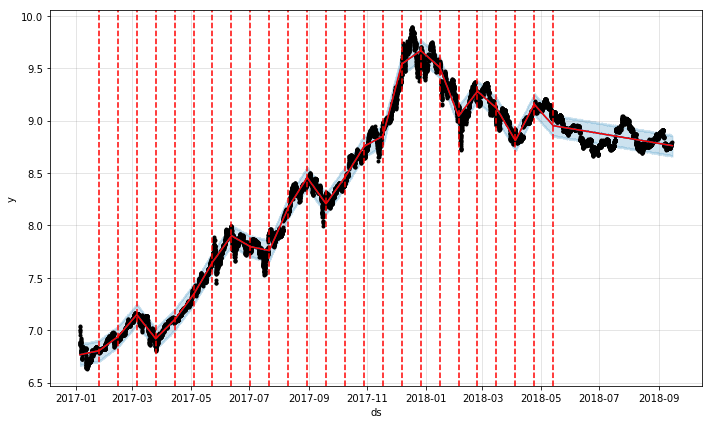

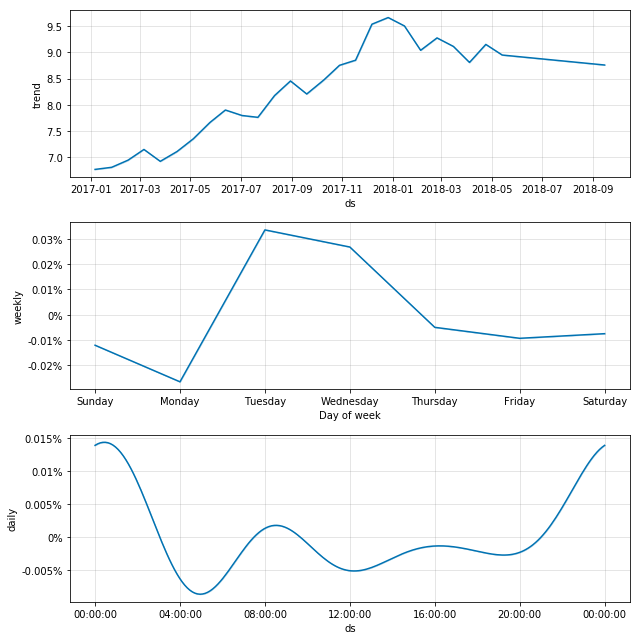

In [11]:
df['y'] = df['logWeightedAverage']
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

Log Graphs


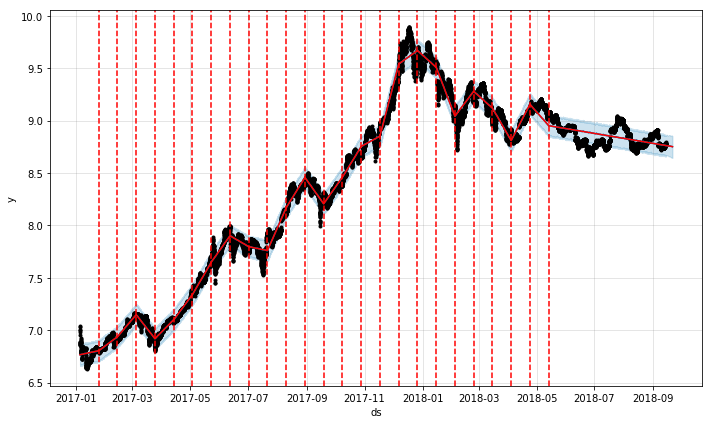

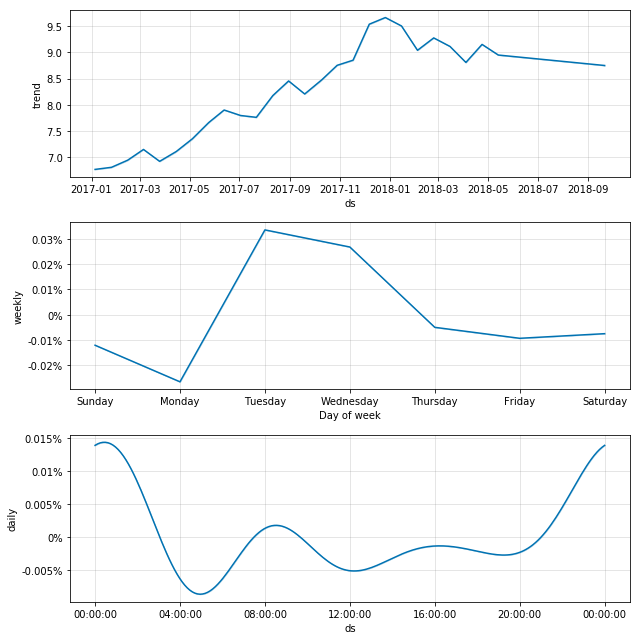

In [12]:
future = m.make_future_dataframe(periods=7)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

Log Graphs


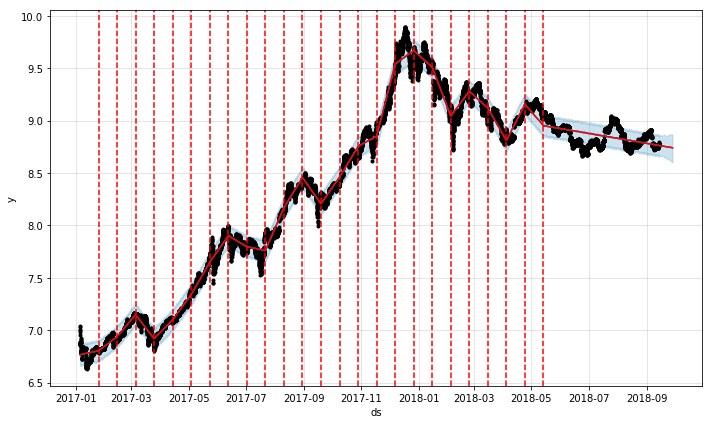

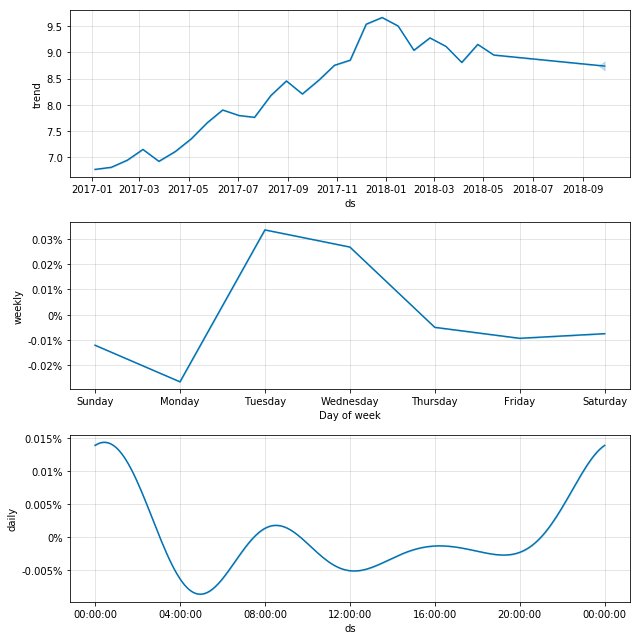

In [13]:
future = m.make_future_dataframe(periods=14)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

Log Graphs


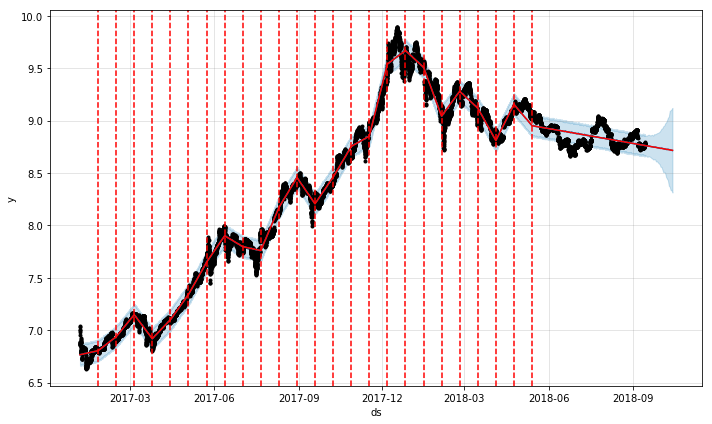

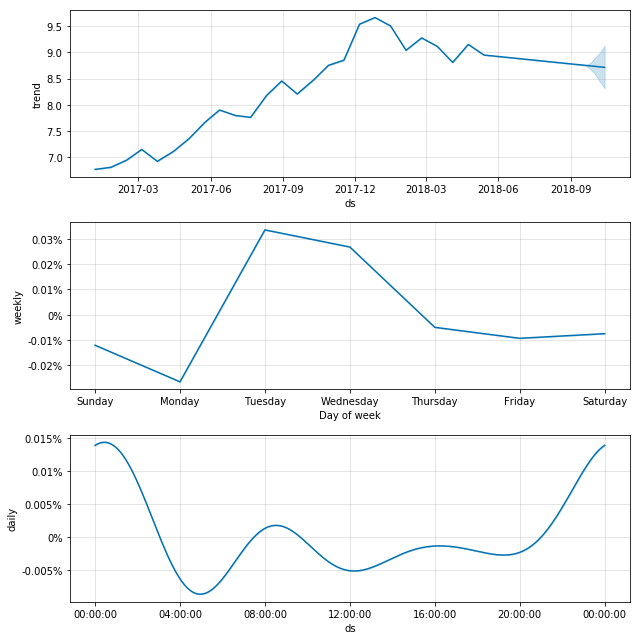

In [14]:
future = m.make_future_dataframe(periods=30)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Log Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

The intraday behavior here is shifted slightly to the right with less pronounced peaks for the assumed non-North America regions. My assumption for this is that Bitcoin trading was a lot more US-dominated prior to the recent spike, and the log graph captures the larger relative spike from US based trading. Whereas the other regions increased their proportional trading when the price was higher and thus fluctuations in price were higher in terms of absolute prices. Not sure how to explain the right shift--maybe a gradual change in the macro behavior of the market to the left recently?

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


1


/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


2


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


3


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


4


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


5


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


6


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


7


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


8


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


9


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


10


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


11


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


12


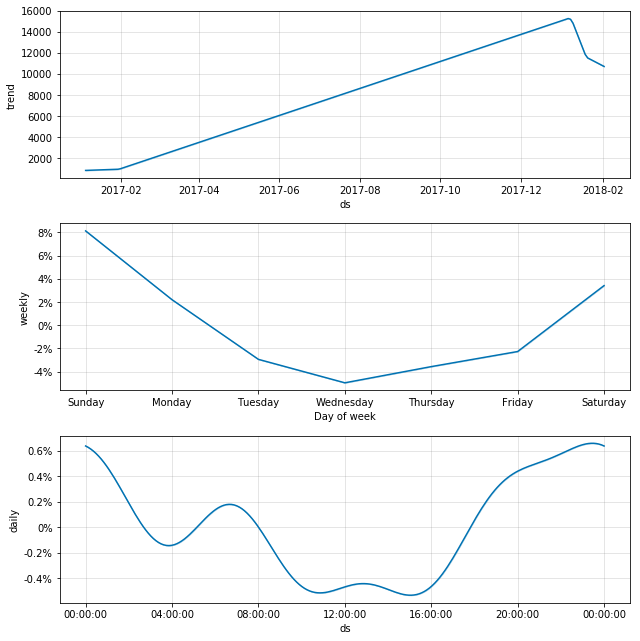

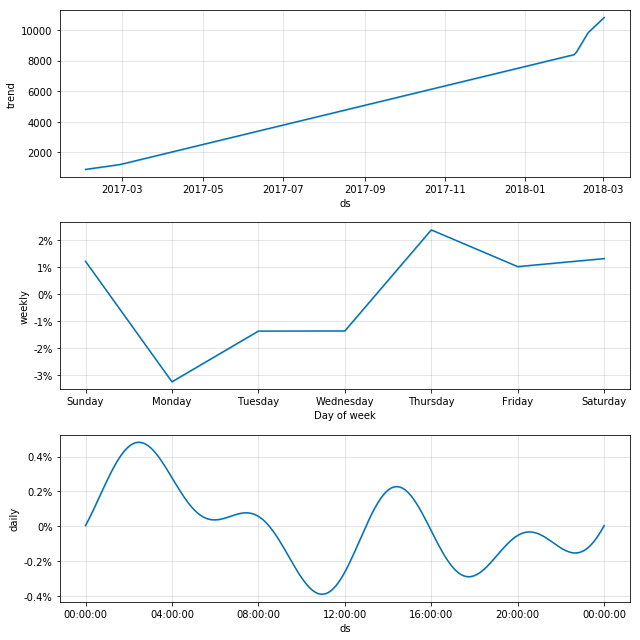

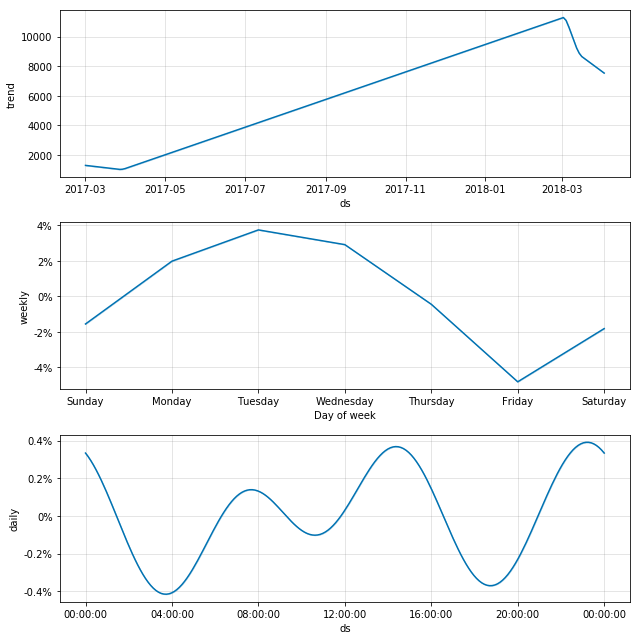

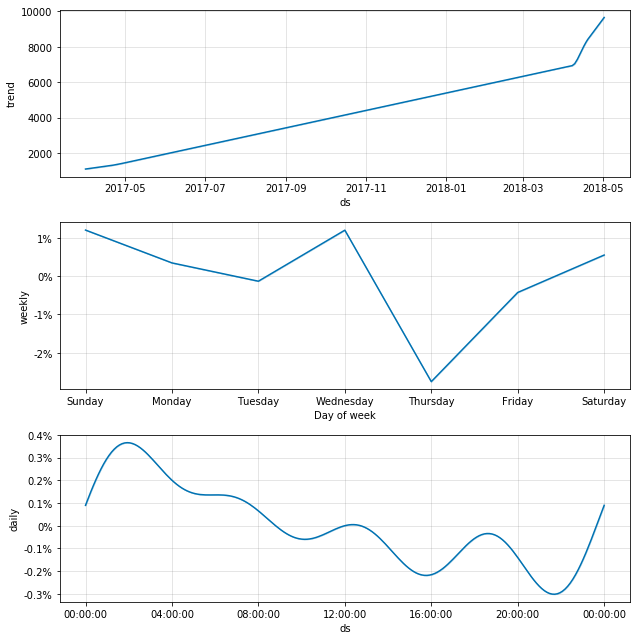

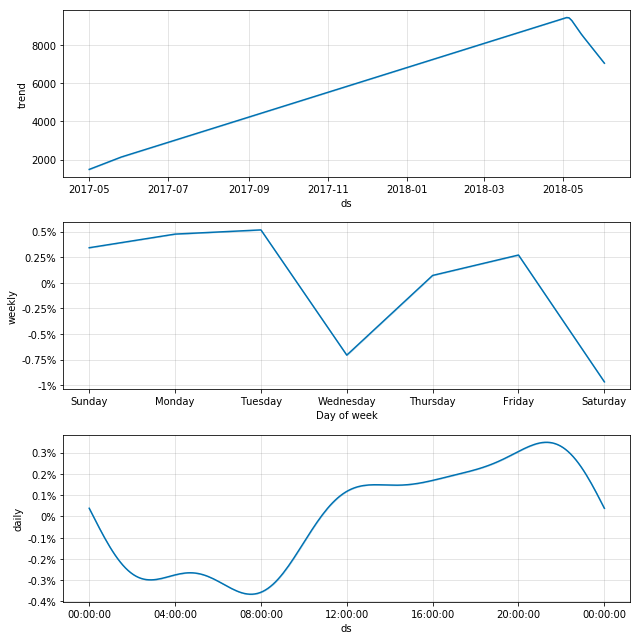

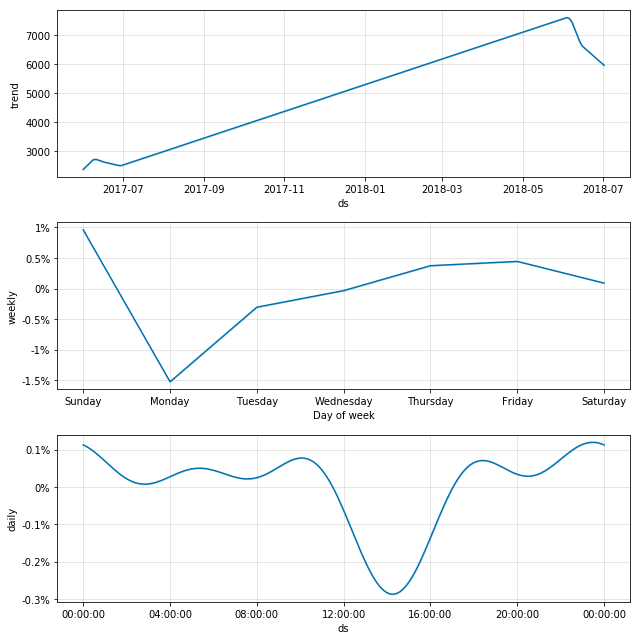

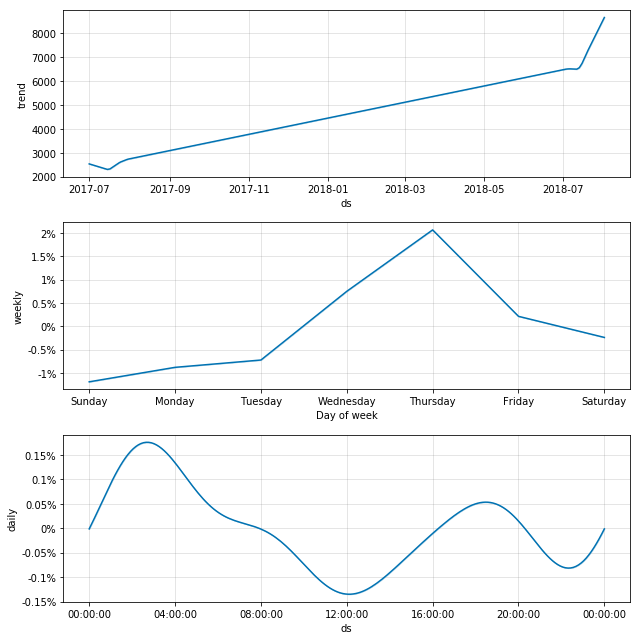

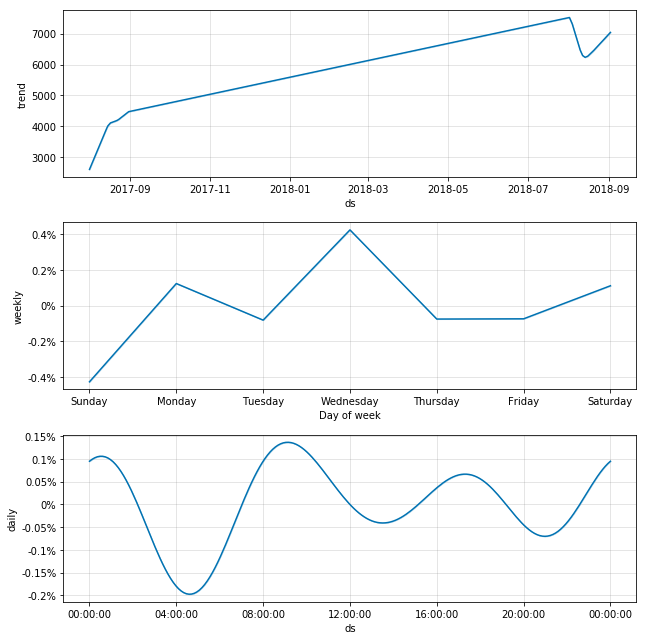

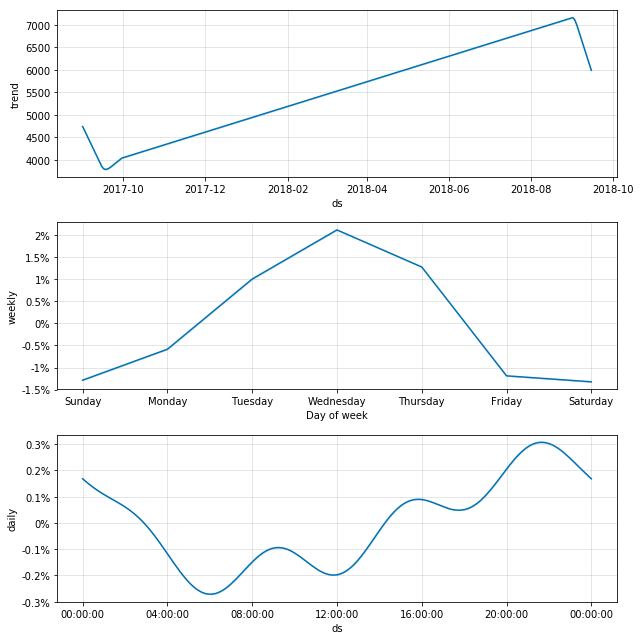

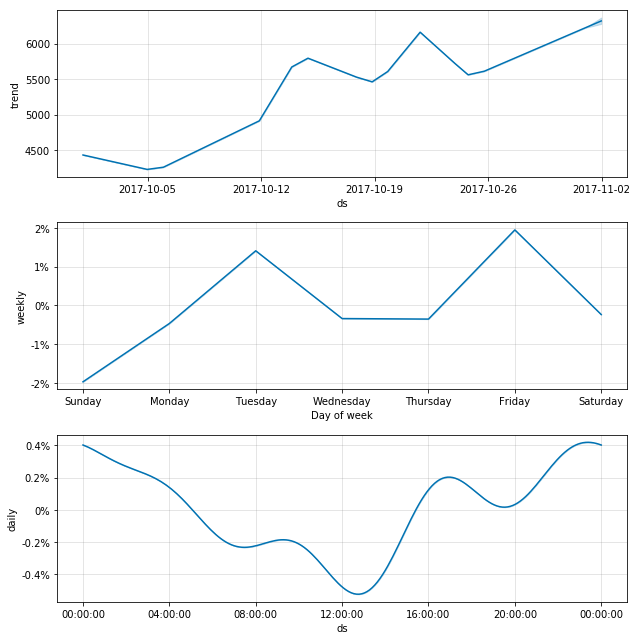

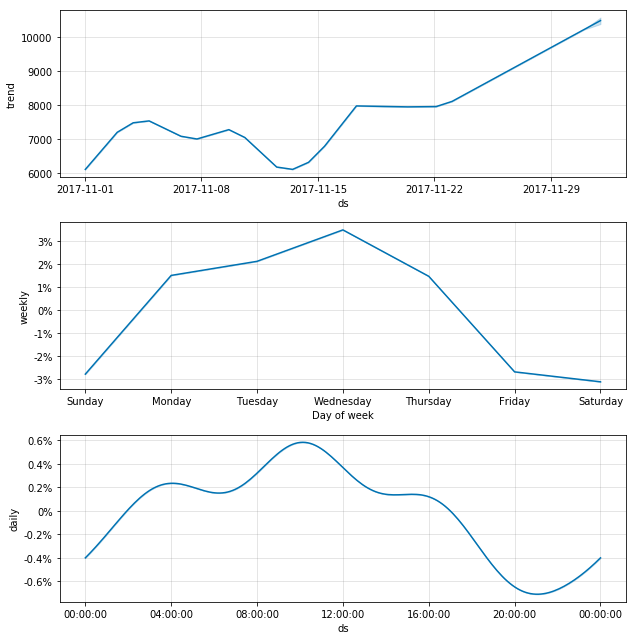

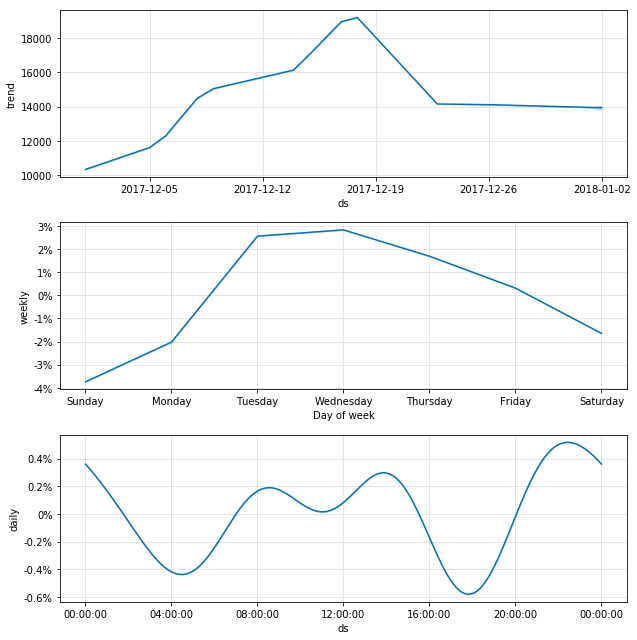

In [15]:
df['y'] = df['weightedAverage']
d = dict(tuple(df.groupby(df['ds'].dt.month)))
for i, df_month in d.items():
    print (i)
    m = Prophet(seasonality_mode='multiplicative')
    m.fit(df_month)
    future = m.make_future_dataframe(periods=1)
    future.tail()
    forecast = m.predict(future)
    fig2 = m.plot_components(forecast)
    

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


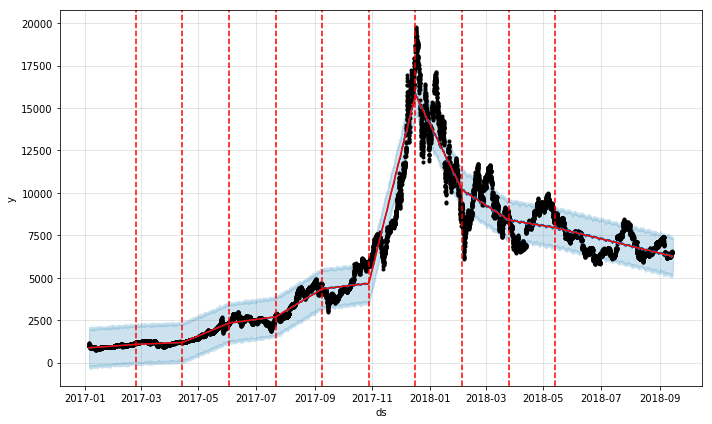

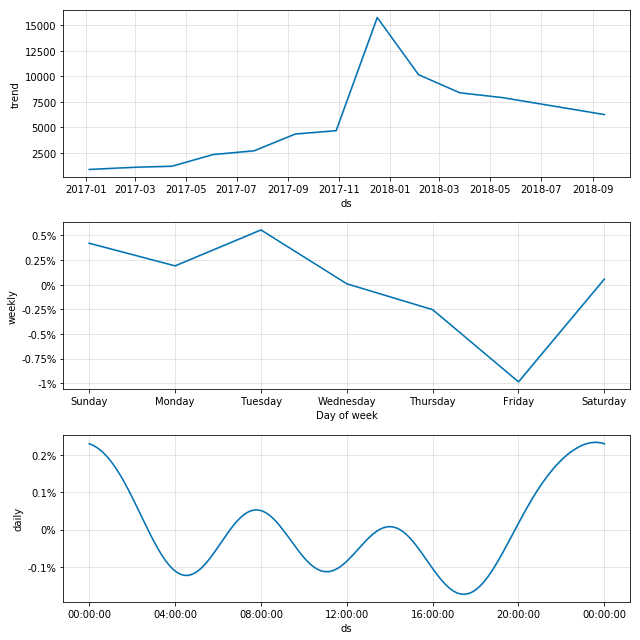

In [16]:
#Changing n_changepoints
m = Prophet(n_changepoints = 10, seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/robert/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Linear Graphs


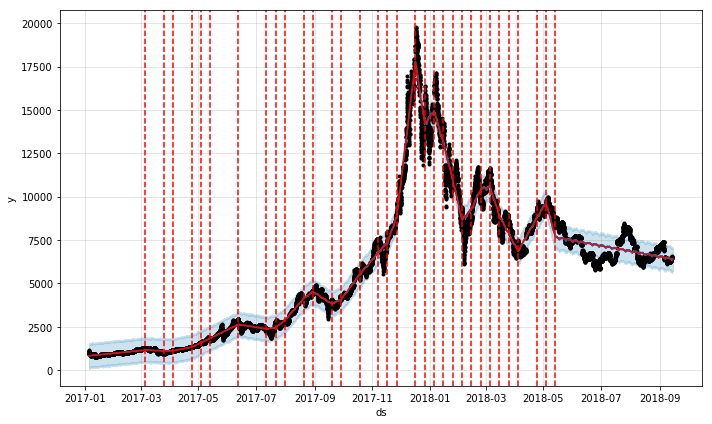

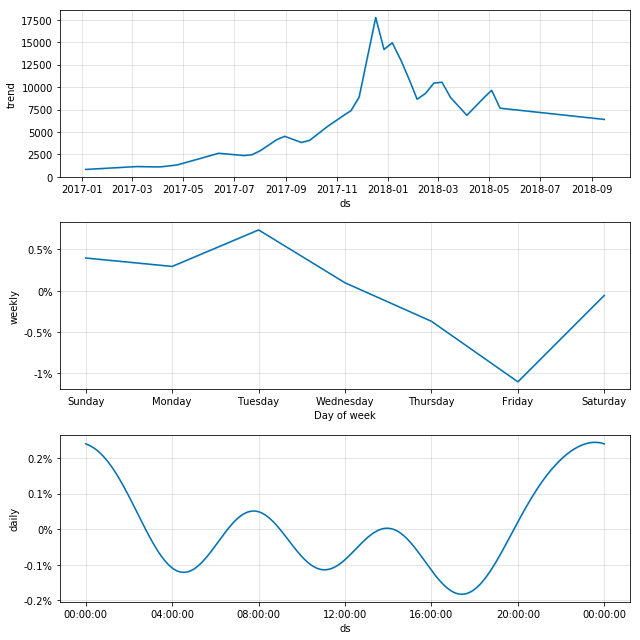

In [17]:
#Changing n_changepoints
m = Prophet(n_changepoints = 50, seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(periods=1)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
print("Linear Graphs")
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)